In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.DataFrame({
    'age': [42, 56, 34, 47, 62, 39, 50, 45, 58, 41],
    'blood_pressure': [120, 138, 115, 130, 145, 125, 135, 122, 140, 128],
    'sugar_level': [7.2, 6.8, 5.5, 8.1, 6.5, 7.8, 5.9, 6.1, 7.3, 6.7],
    'alcohol_consumption': [10, 0, 2, 15, 0, 5, 0, 8, 0, 3],
    'smoking': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'hemoglobin': [13.4, 11.7, 14.2, 10.9, 12.3, 13.1, 11.5, 12.7, 10.5, 14.5],
    'proteinuria': [1, 0, 1, 0, 0, 1, 0, 1, 0, 1],
    'kidney_failure': [0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
})

# Split the data into features and target variable
X = data.drop('kidney_failure', axis=1)
y = data['kidney_failure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(criterion ='entropy',n_estimators=100, random_state=42)

# Train the random forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


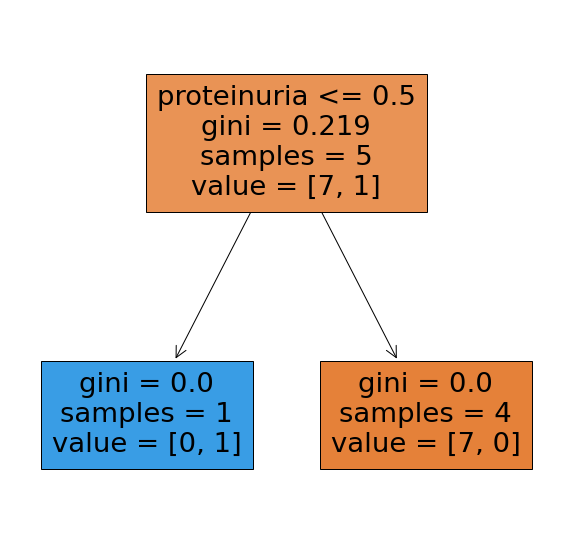

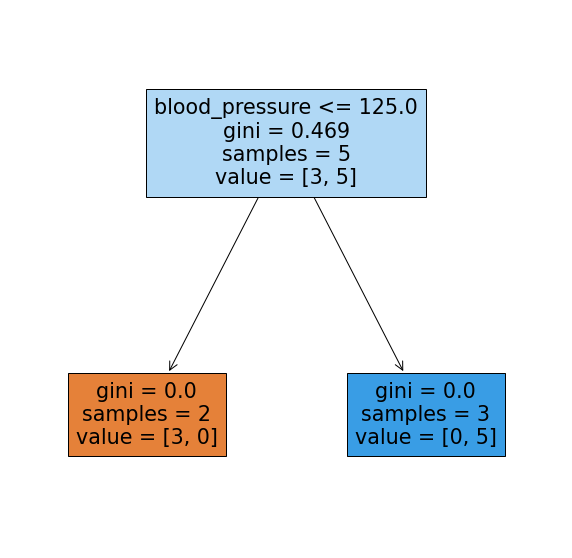

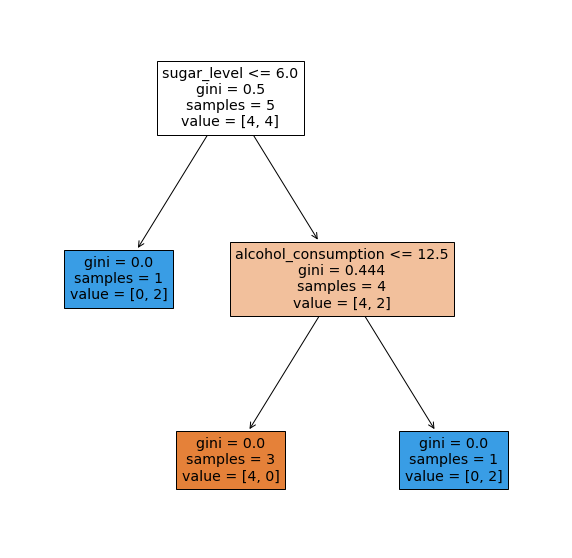

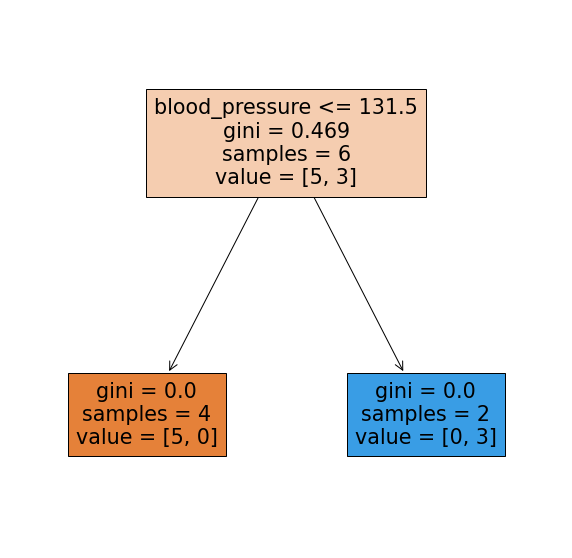

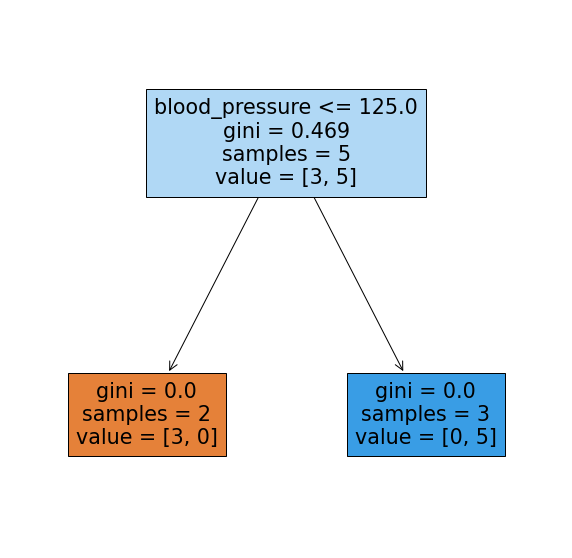

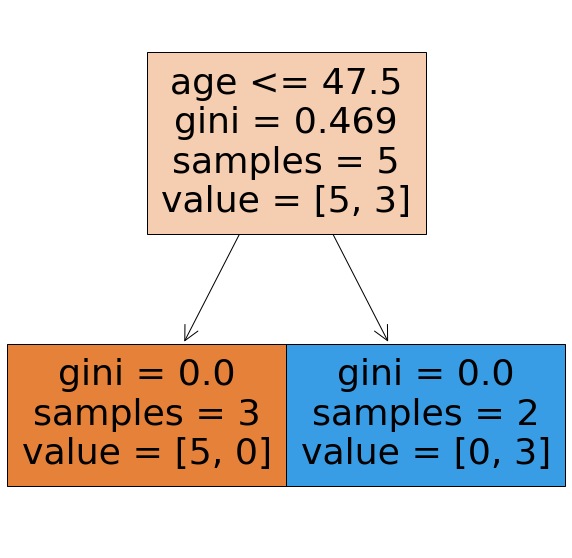

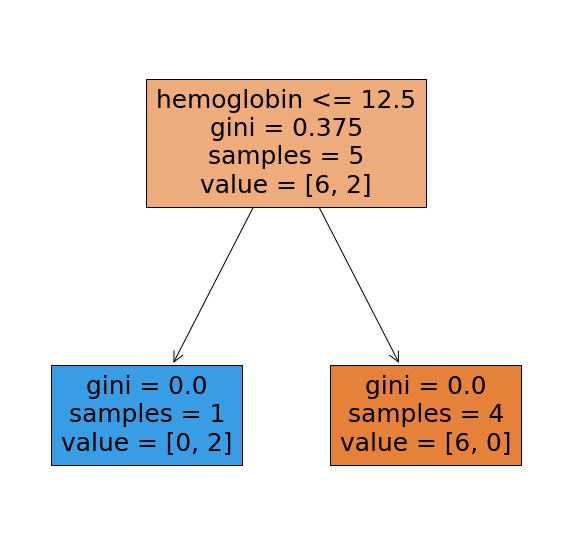

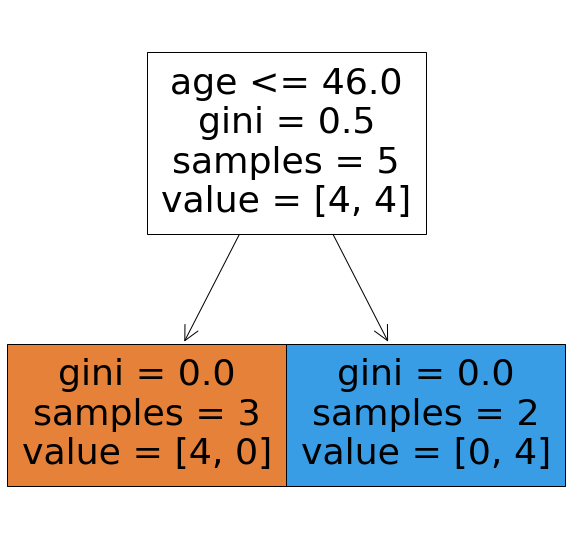

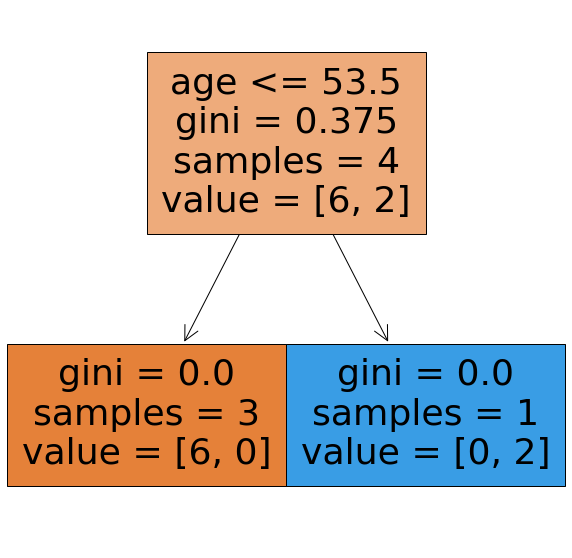

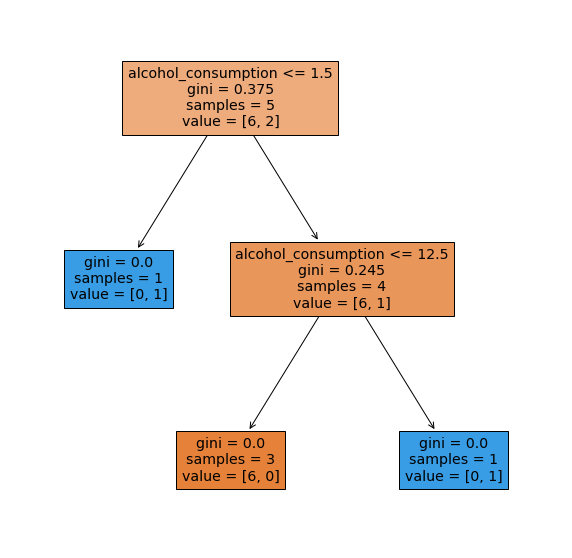

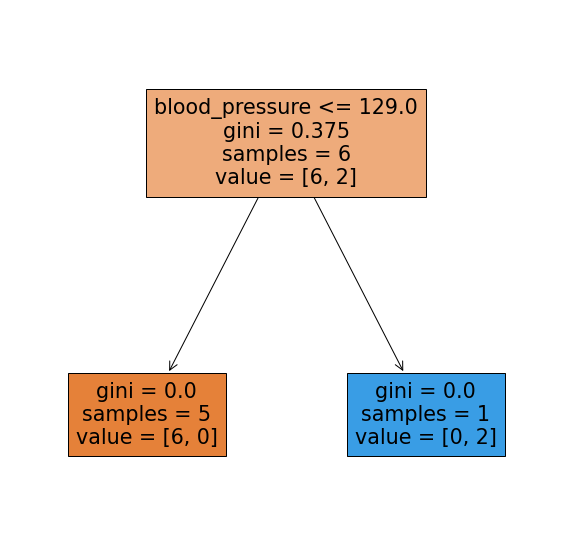

In [4]:
from sklearn import tree
import matplotlib.pyplot as plt
for i in range(0,11):
 single_tree = rf_classifier.estimators_[i]
 plt.figure(figsize=(10, 10))
 tree.plot_tree(single_tree, filled=True, feature_names=['age', 'blood_pressure', 'sugar_level', 'alcohol_consumption', 'smoking','hemoglobin','proteinuria'])
 plt.show()

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve,auc

In [12]:
df=pd.read_csv("C:\\Users\\akanksha\\Downloads\\heart (1).csv")

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1)age:
2)sex :1-male,0-female
cp: the chest pain experienced (value 1: typical angina, value 2: typical angina , value 3: non-anginal pain , value 4: asymptomatic
3)trestbps: the person'resting blood presure(mm Hg on admission to the hospital)
4) chol: the person's facting blood sugar(>120 mg/dl, 1=true,0=false)
5) fbs: The person's fasting blood sugar(>120 mg/dl,1=true,0=false)
6) restecg= Resting electrocardiographic measurement(0=normal,1=having ST-T wave abnormally, 2= showing probable or definite left ventricular hypertrophy by Estes'criteria
7) thalach: the person's max heart rate achieved 
8) exang: Exercise induced angina (1=yes, 0=no)
9) oldpeak: ST depression induced by exercise relative to rest('ST' relates to positions on the ECG plot.)
10) slope: the slope of the peak exercise ST segment(Value 1: unsloping ,  2: flat, 3: downsloping)
11)ca: The number of major vessels(0-3)
12)thal: A blood disorder called thalasssemia(3=normal, 6=fixed defect; 7=reversable defect_
13) target: heart disease(0=no ,1 =yes)

In [14]:
df.columns:['age', 'sex' , 'cp','trestbps',  'chol',' fbs' ,'restecg ','thalach', 'exang' ,'oldpeak', 'slope' ,'ca','thal' ,' target']
    

In [15]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

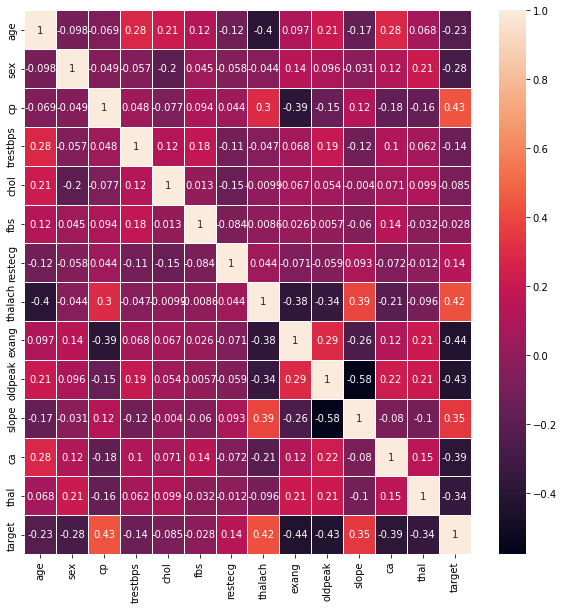

In [18]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,ax=ax)
plt.show()

<AxesSubplot:ylabel='trestbps'>

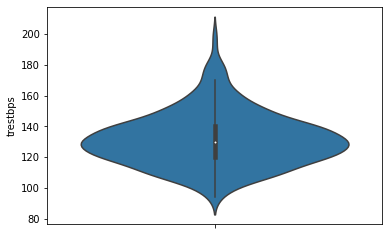

In [20]:
#this used to see the outlier in the data set
sns.violinplot(y='trestbps',data=df)

<AxesSubplot:ylabel='chol'>

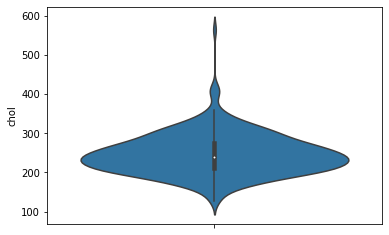

In [21]:
sns.violinplot(y='chol',data=df)

<AxesSubplot:ylabel='thalach'>

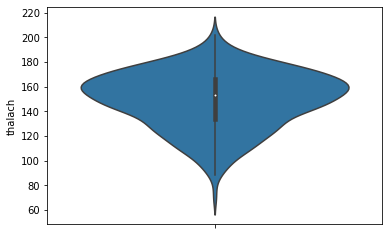

In [22]:
sns.violinplot(y='thalach',data=df)

<AxesSubplot:ylabel='oldpeak'>

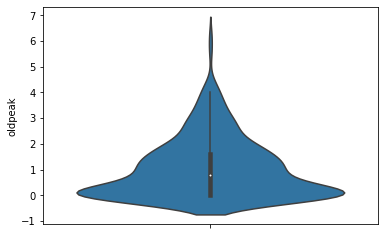

In [23]:
sns.violinplot(y='oldpeak',data=df)

<AxesSubplot:ylabel='slope'>

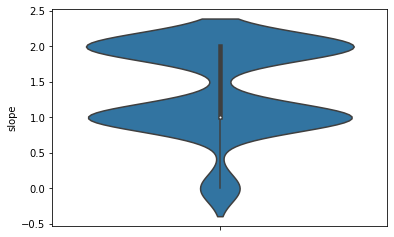

In [25]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('target',1),df['target'],test_size=0.30,random_state=42)

C:\Users\akanksha\AppData\Local\Temp\ipykernel_36760\3960037557.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train,x_test,y_train,y_test=train_test_split(df.drop('target',1),df['target'],test_size=0.30,random_state=42)


In [26]:
model=RandomForestClassifier(max_depth=5)
model.fit(x_train,y_train)


RandomForestClassifier(max_depth=5)

In [27]:
y_predict=model.predict(x_test)

In [28]:
cm=confusion_matrix(y_test,y_predict)

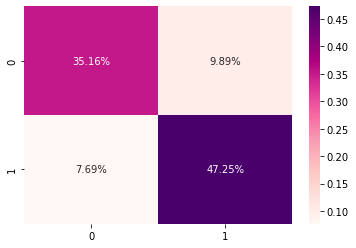

Accuracy is:  82.41758241758241


In [36]:
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%',cmap='RdPu')
plt.show()
ac=accuracy_score(y_test,y_predict)
print('Accuracy is: ',ac*100)

In [37]:
y_pred_quant=model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_quant)
auc(fpr,tpr)
# if we auc is 0.9 is very great model


0.9195121951219513